<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [5]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [7]:
#data = pd.read_csv('./train.csv')
data = pd.read_csv('/content/drive/MyDrive/Deep learning/Первое соревнование/train.csv')

In [8]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

1) Выведем 5 случайных строчек из train

In [10]:
data.sample(n=5, random_state=42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0


2) Посмотрим наличие nan.

In [11]:
data.isna().sum().to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Преобразуем TotalSpent в числовое значение (возможно, в нем скрыты пропущенные значения)

In [13]:
data['TotalSpent'] = data['TotalSpent'].replace(r'^\s+$', np.nan, regex=True)
data['TotalSpent'] = data['TotalSpent'].astype('float64')
data.isna().sum().to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
data = data.replace(r'^\s+$', np.nan, regex=True)#df.replace(" ", np.NaN, inplace=True)
data.isna().sum().to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Определим строки с пропущенными значениями

In [15]:
data[np.isnan(data.TotalSpent)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Строкам с пропущенными значениями соответствуют нулевые значения ClientPeriod. К тому же, их достаточно мало, по сравнению с размером выборки (9 штук), поэтому удалим их

In [16]:
data = data.dropna()
data.isna().sum().to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Либо заполним их нулями (Т.к. данные соответствуют нулевым значениям ClientPeriod, можно предположить, что данных на клиента еще нет)

In [17]:
data = data.fillna(0)
data.isna().sum().to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
data_origin = data

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1) Построим гистограммы для численных признаков

Text(0.5, 1.0, 'TotalSpent')

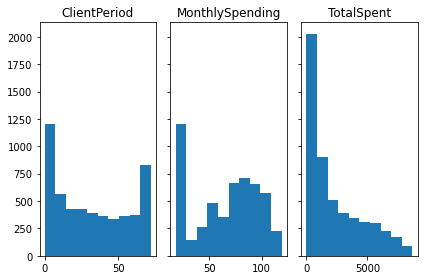

In [15]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(data[num_cols[0]])
axs[0].set_title(num_cols[0])
axs[1].hist(data[num_cols[1]])
axs[1].set_title(num_cols[1])
axs[2].hist(data[num_cols[2]])
axs[2].set_title(num_cols[2])

Построим boxplot для численных признаков

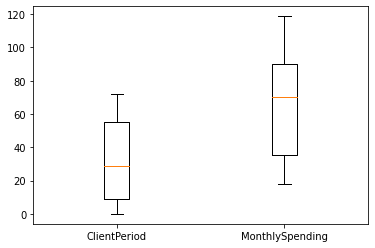

In [16]:
dat = [data[num_cols[0]], data[num_cols[1]]]
fig, ax = plt.subplots()
ax.boxplot(dat)
plt.xticks([1, 2], [num_cols[0], num_cols[1]])
plt.show()

([<matplotlib.axis.XTick at 0x7f97f2d33710>], [Text(0, 0, 'TotalSpent')])

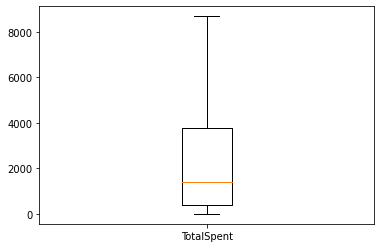

In [17]:
plt.boxplot(data[num_cols[2]])
plt.xticks([1], [num_cols[2]])

*Ни одно из распределений не является нормальным*

Построим диаграммы для категориальных признаков

Text(0.5, 1.0, 'HasInternetService')

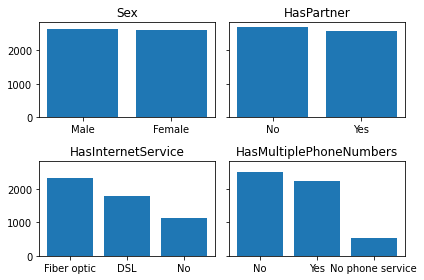

In [18]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].bar(data[cat_cols[0]].value_counts().keys(),data[cat_cols[0]].value_counts())
axs[0,0].set_title(cat_cols[0])
axs[0,1].bar(data[cat_cols[2]].value_counts().keys(),data[cat_cols[2]].value_counts())
axs[0,1].set_title(cat_cols[2])
axs[1,1].bar(data[cat_cols[5]].value_counts().keys(),data[cat_cols[5]].value_counts())
axs[1,1].set_title(cat_cols[5])
axs[1,0].bar(data[cat_cols[6]].value_counts().keys(),data[cat_cols[6]].value_counts())
axs[1,0].set_title(cat_cols[6])

Text(0.5, 1.0, 'HasContractPhone')

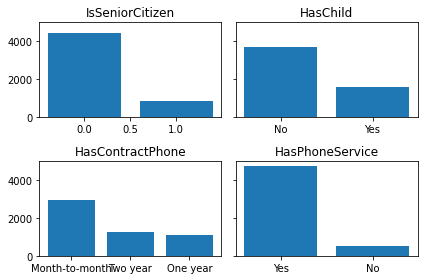

In [19]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].bar(data[cat_cols[1]].value_counts().keys(),data[cat_cols[1]].value_counts())
axs[0,0].set_title(cat_cols[1])
axs[0,1].bar(data[cat_cols[3]].value_counts().keys(),data[cat_cols[3]].value_counts())
axs[0,1].set_title(cat_cols[3])
axs[1,1].bar(data[cat_cols[4]].value_counts().keys(),data[cat_cols[4]].value_counts())
axs[1,1].set_title(cat_cols[4])
axs[1,0].bar(data[cat_cols[13]].value_counts().keys(),data[cat_cols[13]].value_counts())
axs[1,0].set_title(cat_cols[13])

Text(0.5, 1.0, 'HasTechSupportAccess')

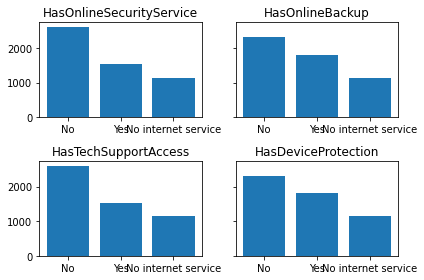

In [20]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].bar(data[cat_cols[7]].value_counts().keys(),data[cat_cols[7]].value_counts())
axs[0,0].set_title(cat_cols[7])
axs[0,1].bar(data[cat_cols[8]].value_counts().keys(),data[cat_cols[8]].value_counts())
axs[0,1].set_title(cat_cols[8])
axs[1,1].bar(data[cat_cols[9]].value_counts().keys(),data[cat_cols[9]].value_counts())
axs[1,1].set_title(cat_cols[9])
axs[1,0].bar(data[cat_cols[10]].value_counts().keys(),data[cat_cols[10]].value_counts())
axs[1,0].set_title(cat_cols[10])

Text(0.5, 1.0, 'PaymentMethod')

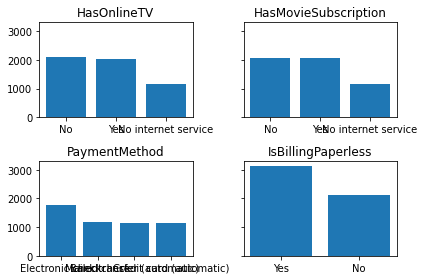

In [21]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].bar(data[cat_cols[11]].value_counts().keys(),data[cat_cols[11]].value_counts())
axs[0,0].set_title(cat_cols[11])
axs[0,1].bar(data[cat_cols[12]].value_counts().keys(),data[cat_cols[12]].value_counts())
axs[0,1].set_title(cat_cols[12])
axs[1,1].bar(data[cat_cols[14]].value_counts().keys(),data[cat_cols[14]].value_counts())
axs[1,1].set_title(cat_cols[14])
axs[1,0].bar(data[cat_cols[15]].value_counts().keys(),data[cat_cols[15]].value_counts())
axs[1,0].set_title(cat_cols[15])

Также построим круговые диаграммы

Text(0.5, 1.0, 'PaymentMethod')

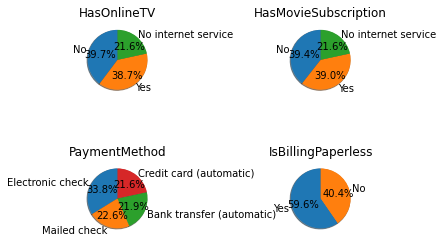

In [22]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].pie(data[cat_cols[11]].value_counts(),labels=data[cat_cols[11]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,0].set_title(cat_cols[11])
axs[0,1].pie(data[cat_cols[12]].value_counts(),labels=data[cat_cols[12]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,1].set_title(cat_cols[12])
axs[1,1].pie(data[cat_cols[14]].value_counts(),labels=data[cat_cols[14]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,1].set_title(cat_cols[14])
axs[1,0].pie(data[cat_cols[15]].value_counts(),labels=data[cat_cols[15]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,0].set_title(cat_cols[15])

Text(0.5, 1.0, 'HasInternetService')

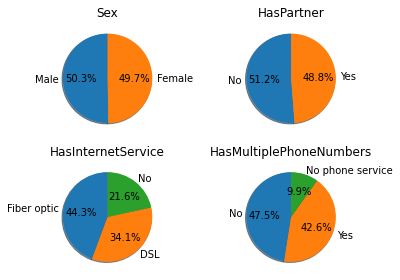

In [23]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].pie(data[cat_cols[0]].value_counts(),labels=data[cat_cols[0]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,0].set_title(cat_cols[0])
axs[0,1].pie(data[cat_cols[2]].value_counts(),labels=data[cat_cols[2]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,1].set_title(cat_cols[2])
axs[1,1].pie(data[cat_cols[5]].value_counts(),labels=data[cat_cols[5]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,1].set_title(cat_cols[5])
axs[1,0].pie(data[cat_cols[6]].value_counts(),labels=data[cat_cols[6]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,0].set_title(cat_cols[6])

Text(0.5, 1.0, 'HasContractPhone')

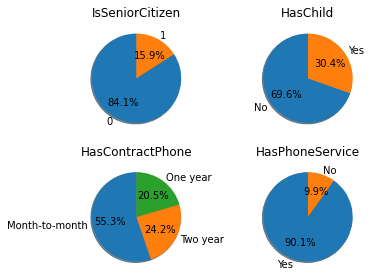

In [24]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].pie(data[cat_cols[1]].value_counts(),labels=data[cat_cols[1]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,0].set_title(cat_cols[1])
axs[0,1].pie(data[cat_cols[3]].value_counts(),labels=data[cat_cols[3]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,1].set_title(cat_cols[3])
axs[1,1].pie(data[cat_cols[4]].value_counts(),labels=data[cat_cols[4]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,1].set_title(cat_cols[4])
axs[1,0].pie(data[cat_cols[13]].value_counts(),labels=data[cat_cols[13]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,0].set_title(cat_cols[13])

Text(0.5, 1.0, 'HasTechSupportAccess')

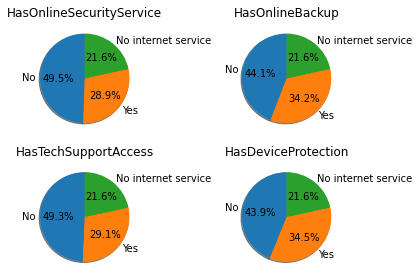

In [25]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

axs[0,0].pie(data[cat_cols[7]].value_counts(),labels=data[cat_cols[7]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,0].set_title(cat_cols[7])
axs[0,1].pie(data[cat_cols[8]].value_counts(),labels=data[cat_cols[8]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,1].set_title(cat_cols[8])
axs[1,1].pie(data[cat_cols[9]].value_counts(),labels=data[cat_cols[9]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,1].set_title(cat_cols[9])
axs[1,0].pie(data[cat_cols[10]].value_counts(),labels=data[cat_cols[10]].value_counts().keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,0].set_title(cat_cols[10])

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

1)Обработаем данные для LogisticRegression (с помощью get_dummies, т.к. делает тоже самое)

In [20]:
scaler = StandardScaler()
scaler.fit(data[num_cols])
StandardScaler()
data[num_cols] = scaler.transform(data[num_cols])
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(data[cat_cols])
#enc.transform(data[cat_cols]).toarray()
data = pd.get_dummies(data, columns=cat_cols)
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


2) Разделим на train/valid и используем LogisticRegressionCV.


In [21]:
y = data[target_col]
X = data.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegressionCV(cv=5, random_state=0, scoring='roc_auc',refit=True).fit(X_train, y_train)
#clf.predict(X_train)
#clf.predict_proba(X_train)
print(clf.score(X_test, y_test))

0.8410981654395129


Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
#data = data_origin
y_train = data[target_col]
X_train = data.drop(target_col, axis=1)

In [24]:
cls = make_pipeline(StandardScaler(),LogisticRegression())
param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
gsCV = GridSearchCV(cls, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
gsCV.fit(X_train, y_train)
print(gsCV.best_params_)
print(gsCV.best_score_)
print(gsCV.best_estimator_)

{'logisticregression__C': 100.0}
0.8448246081024792
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=100.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


Лучшее качество при поиске по сетке 0.8448246081024792, параметр С=100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [25]:
!pip install catboost

import catboost # документация: https://catboost.ai/docs

data = data_origin
y = data[target_col]
X = data.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

     |████████████████████████████████| 76.4 MB 23 kB/s 


1) Протестируем catboost cо стандартными параметрами.

In [26]:
boosting_model = catboost.CatBoostClassifier()

boosting_model.fit(X_train, y_train,cat_features=cat_cols)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.017658
0:	learn: 0.6819326	total: 63.4ms	remaining: 1m 3s
1:	learn: 0.6699197	total: 78.1ms	remaining: 39s
2:	learn: 0.6591741	total: 94.5ms	remaining: 31.4s
3:	learn: 0.6500929	total: 99.3ms	remaining: 24.7s
4:	learn: 0.6426896	total: 106ms	remaining: 21.2s
5:	learn: 0.6330013	total: 119ms	remaining: 19.7s
6:	learn: 0.6235424	total: 133ms	remaining: 18.8s
7:	learn: 0.6141566	total: 145ms	remaining: 18s
8:	learn: 0.6064575	total: 153ms	remaining: 16.8s
9:	learn: 0.5984536	total: 165ms	remaining: 16.3s
10:	learn: 0.5903986	total: 177ms	remaining: 15.9s
11:	learn: 0.5841749	total: 182ms	remaining: 15s
12:	learn: 0.5773090	total: 191ms	remaining: 14.5s
13:	learn: 0.5711777	total: 209ms	remaining: 14.7s
14:	learn: 0.5648043	total: 218ms	remaining: 14.3s
15:	learn: 0.5592259	total: 225ms	remaining: 13.8s
16:	learn: 0.5531700	total: 237ms	remaining: 13.7s
17:	learn: 0.5479989	total: 248ms	remaining: 13.5s
18:	learn: 0.5436241	total: 254ms	remaining: 13.1s
19:	learn: 0.

In [27]:
boosting_model.score(X_test,y_test)

0.7978173463526709

2) Протестируем разные занчения параметра количества деревьев и learning_rate'а.

In [30]:
boosting_model =catboost.CatBoostClassifier(cat_features=cat_cols, 
                                            random_seed=42, verbose=False)
grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
      'depth': [2, 4, 6, 8, 10],
      'l2_leaf_reg': [1, 3, 5, 7, 9],
      'iterations' : [100, 200, 300]}
grid_search_result = boosting_model.grid_search(grid, 
                           X_train, 
                           y_train, 
                           plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4967441512
bestIteration = 99

0:	loss: 0.4967442	best: 0.4967442 (0)	total: 311ms	remaining: 1m 56s

bestTest = 0.4439239409
bestIteration = 99

1:	loss: 0.4439239	best: 0.4439239 (1)	total: 614ms	remaining: 1m 54s

bestTest = 0.4414805901
bestIteration = 99

2:	loss: 0.4414806	best: 0.4414806 (2)	total: 911ms	remaining: 1m 52s

bestTest = 0.4428939402
bestIteration = 71

3:	loss: 0.4428939	best: 0.4414806 (2)	total: 1.23s	remaining: 1m 54s

bestTest = 0.4399152626
bestIteration = 62

4:	loss: 0.4399153	best: 0.4399153 (4)	total: 1.54s	remaining: 1m 54s

bestTest = 0.4953379718
bestIteration = 99

5:	loss: 0.4953380	best: 0.4399153 (4)	total: 1.86s	remaining: 1m 54s

bestTest = 0.4436193698
bestIteration = 99

6:	loss: 0.4436194	best: 0.4399153 (4)	total: 2.18s	remaining: 1m 54s

bestTest = 0.4438648938
bestIteration = 81

7:	loss: 0.4438649	best: 0.4399153 (4)	total: 2.49s	remaining: 1m 54s

bestTest = 0.4418447263
bestIteration = 92

8:	loss: 0.4418447	best: 0.4399153 

In [31]:
grid_search_result['params']

{'depth': 2, 'iterations': 100, 'l2_leaf_reg': 9, 'learning_rate': 0.2}

In [32]:
best_boosting_model = catboost.CatBoostClassifier(iterations = 100, learning_rate = 0.2, depth = 2, l2_leaf_reg = 9, cat_features=cat_cols)
best_boosting_model.fit(X_train, y_train)
y_train_pred = best_boosting_model.predict_proba(X_train)[:, 1]
y_test_pred = best_boosting_model.predict_proba(X_test)[:, 1]

0:	learn: 0.6330041	total: 2.4ms	remaining: 237ms
1:	learn: 0.5902716	total: 4.86ms	remaining: 238ms
2:	learn: 0.5591285	total: 6.67ms	remaining: 216ms
3:	learn: 0.5367403	total: 8.55ms	remaining: 205ms
4:	learn: 0.5202503	total: 11ms	remaining: 210ms
5:	learn: 0.5021047	total: 13.1ms	remaining: 205ms
6:	learn: 0.4882343	total: 15.4ms	remaining: 205ms
7:	learn: 0.4745019	total: 17.3ms	remaining: 199ms
8:	learn: 0.4642590	total: 19.3ms	remaining: 195ms
9:	learn: 0.4560016	total: 21ms	remaining: 189ms
10:	learn: 0.4491157	total: 22.9ms	remaining: 185ms
11:	learn: 0.4429584	total: 24.7ms	remaining: 181ms
12:	learn: 0.4388949	total: 26.5ms	remaining: 177ms
13:	learn: 0.4344591	total: 28.3ms	remaining: 174ms
14:	learn: 0.4304143	total: 30.3ms	remaining: 172ms
15:	learn: 0.4276017	total: 33ms	remaining: 173ms
16:	learn: 0.4253206	total: 34.7ms	remaining: 170ms
17:	learn: 0.4232985	total: 36.6ms	remaining: 167ms
18:	learn: 0.4210990	total: 38.4ms	remaining: 164ms
19:	learn: 0.4199965	total: 4

In [33]:
print("Лучшее качество: ", 'train auc = ', roc_auc_score(y_train, y_train_pred), ',',
      'test auc = ', roc_auc_score(y_test, y_test_pred))
print('При следующих параметрах:', grid_search_result['params'])

Лучшее качество:  train auc =  0.8539403377450052 , test auc =  0.8442971631497402
При следующих параметрах: {'depth': 2, 'l2_leaf_reg': 9, 'iterations': 100, 'learning_rate': 0.2}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [34]:
best_model = boosting_model

In [36]:
#X_test = pd.read_csv('./test.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Deep learning/Первое соревнование/test.csv')
#submission = pd.read_csv('./submission.csv')
submission = pd.read_csv('/content/drive/MyDrive/Deep learning/Первое соревнование/submission.csv')

X_test = X_test.replace(r'^\s+$', np.nan, regex=True)
X_test['TotalSpent'] = X_test['TotalSpent'].astype('float64')
X_test = X_test.fillna(0)

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
#submission.to_csv('./my_submission.csv',index=False)
submission.to_csv('/content/drive/MyDrive/Deep learning/Первое соревнование/submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.